# Adriati Manuk Allo
# 2209106018
# A1 22

Dataset: https://www.kaggle.com/datasets/arunrk7/surface-crack-detection

## Menginstal paket Kaggle

In [1]:
!pip install -q kaggle

## Mengunggah file dari komputer ke Google Colab

In [2]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


##  Mengatur konfigurasi dan kredensial Kaggle

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

## Mengunduh dataset

In [4]:
!kaggle datasets download -d arunrk7/surface-crack-detection

 99% 230M/233M [00:13<00:00, 20.5MB/s]
100% 233M/233M [00:13<00:00, 17.7MB/s]


## Mengekstrak dataset dan menyimpannya dalam folder baru dengan nama "surface-crack"

In [5]:
!unzip surface-crack-detection.zip -d surface-crack

Streaming output truncated to the last 5000 lines.
  inflating: surface-crack/Positive/15001_1.jpg  
  inflating: surface-crack/Positive/15002_1.jpg  
  inflating: surface-crack/Positive/15003_1.jpg  
  inflating: surface-crack/Positive/15004_1.jpg  
  inflating: surface-crack/Positive/15005_1.jpg  
  inflating: surface-crack/Positive/15006_1.jpg  
  inflating: surface-crack/Positive/15007_1.jpg  
  inflating: surface-crack/Positive/15008_1.jpg  
  inflating: surface-crack/Positive/15009_1.jpg  
  inflating: surface-crack/Positive/15010_1.jpg  
  inflating: surface-crack/Positive/15011_1.jpg  
  inflating: surface-crack/Positive/15012_1.jpg  
  inflating: surface-crack/Positive/15013_1.jpg  
  inflating: surface-crack/Positive/15014_1.jpg  
  inflating: surface-crack/Positive/15015_1.jpg  
  inflating: surface-crack/Positive/15016_1.jpg  
  inflating: surface-crack/Positive/15017_1.jpg  
  inflating: surface-crack/Positive/15018_1.jpg  
  inflating: surface-crack/Positive/15019_1.jpg  

# Data Preparation

## Menginstall paket split-folders

In [6]:
!pip install split-folders

## Import library splitfolders

In [7]:
import splitfolders

## Membagi dataset menjadi subset yang diperlukan untuk pelatihan dan pengujian model

In [8]:
splitfolders.ratio(
    "surface-crack",
    output="dataset_final",
    seed=1337,
    ratio = (.8, .1, .1)
)

Copying files: 40000 files [00:05, 7492.53 files/s]


## Import ImageDataGenerator untuk keperluan image augmentation

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
train_datagen = ImageDataGenerator(
    # mengubah piksel gambar menjadi [0,1] /normalisasi
    rescale = 1/255,
    # memutar gambar hingga 20 derajat
    rotation_range = 20,
    # tingkat kecerahan gambar yaitu dari 0.5 sampai 1.0
    brightness_range = [0.5, 1.0],
    # membalik gambar secara horizontal
    horizontal_flip = True,
    # agar tidak ada kekosongan dalam gambar setelah augmentasi
    fill_mode='nearest'
)

# mengubah piksel gambar menjadi [0,1] /normalisasi
val_datagen = ImageDataGenerator(rescale = 1/255)

In [29]:
train_generator = train_datagen.flow_from_directory(
    # folder yang berisi train data
    '/content/dataset_final/train',
    # mengatur ukuran gambar
    target_size = (227, 227),
    # mengatur ukuran batch data selama train data
    batch_size = 256,
    class_mode = 'categorical',
    # generator untuk data pelatihan
    subset='training'
)

Found 32000 images belonging to 2 classes.


In [30]:
val_generator = val_datagen.flow_from_directory(
    # folder yang berisi train data
    '/content/dataset_final/val',
    # mengatur ukuran gambar
    target_size = (227, 227),
    # mengatur ukuran batch data selama train data
    batch_size = 256,
    class_mode = 'categorical',
    # generator untuk data pelatihan
    subset='training'
)

Found 4000 images belonging to 2 classes.


# Membuat Arsitektur CNN

## Import Library

In [31]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

## Training Model

In [32]:
model = Sequential ([
  # 1. Feature Extraction Layer
  Conv2D(16, 3, padding='same', activation='relu', input_shape=(227, 227, 3)),
  MaxPooling2D(),
  Conv2D(32, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Conv2D(64, 3, padding='same', activation='relu'),
  MaxPooling2D(),

  # 2. Fully-Connected Layer
  Flatten(),
  Dense(128, activation='relu'),
  Dense(64, activation='relu'),
  Dense(2, activation='softmax')
])

In [33]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [34]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 227, 227, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 113, 113, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 113, 113, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 56, 56, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 28, 28, 64)       

In [35]:
history = model.fit(train_generator,
           epochs=10,
           validation_data=val_generator,
           verbose=1)


Epoch 1/10
125/125 [==============================] - 475s 4s/step - loss: 0.2147 - accuracy: 0.9023 - val_loss: 0.0547 - val_accuracy: 0.9837
Epoch 2/10
125/125 [==============================] - 471s 4s/step - loss: 0.0356 - accuracy: 0.9889 - val_loss: 0.0372 - val_accuracy: 0.9915
Epoch 3/10
125/125 [==============================] - 472s 4s/step - loss: 0.0698 - accuracy: 0.9790 - val_loss: 0.0559 - val_accuracy: 0.9845
Epoch 4/10
125/125 [==============================] - 488s 4s/step - loss: 0.0373 - accuracy: 0.9890 - val_loss: 0.0489 - val_accuracy: 0.9885
Epoch 5/10
125/125 [==============================] - 503s 4s/step - loss: 0.0296 - accuracy: 0.9912 - val_loss: 0.0265 - val_accuracy: 0.9920
Epoch 6/10
125/125 [==============================] - 547s 4s/step - loss: 0.0199 - accuracy: 0.9942 - val_loss: 0.0150 - val_accuracy: 0.9948
Epoch 7/10
125/125 [==============================] - 485s 4s/step - loss: 0.0186 - accuracy: 0.9942 - val_loss: 0.0156 - val_accuracy: 0.9950

In [39]:
test_datagen = ImageDataGenerator(
    rescale=1/255.0
)

test_generator = test_datagen.flow_from_directory(
    '/content/dataset_final/test',
    target_size = (227, 227),
    batch_size = 156,
    class_mode = 'categorical',
    subset='training'
)

Found 4000 images belonging to 2 classes.


In [40]:
model.evaluate(test_generator)

26/26 [==============================] - 10s 334ms/step - loss: 0.0206 - accuracy: 0.9960


[0.020633427426218987, 0.9959999918937683]

In [41]:
train_generator.class_indices

{'Negative': 0, 'Positive': 1}

## Mengidentifikasi apakah gambar termasuk kelas "positif" atau "negatif

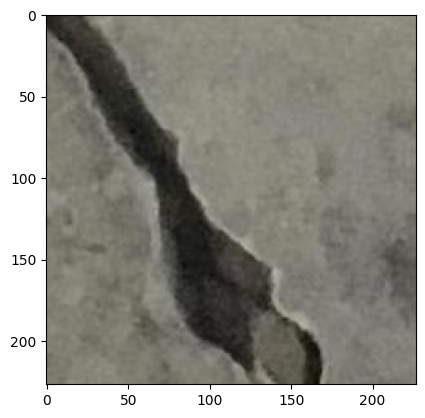

1/1 [==============================] - 0s 41ms/step
classes [[0. 1.]]
Positive


In [44]:
# Import Library
import numpy as np
import tensorflow.keras.utils as image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# gambar yang ingin diuji
path = '/content/dataset_final/val/Positive/00096.jpg' # positif
img = image.load_img(path, target_size=(227,227))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)

print('classes', classes)
# jika classnya 0 makan akan menampilkan gambar termasuk kelas negatif
if classes[0,0]:
  print('Negatif')

# jika classnya 1 makan akan menampilkan gambar termasuk kelas positif
elif classes[0,1]:
  print('Positive')

Dapat dilihat bahwa gambar memiliki kelas positif yang artinya gambar memiliki crack

## Visualisasi Data

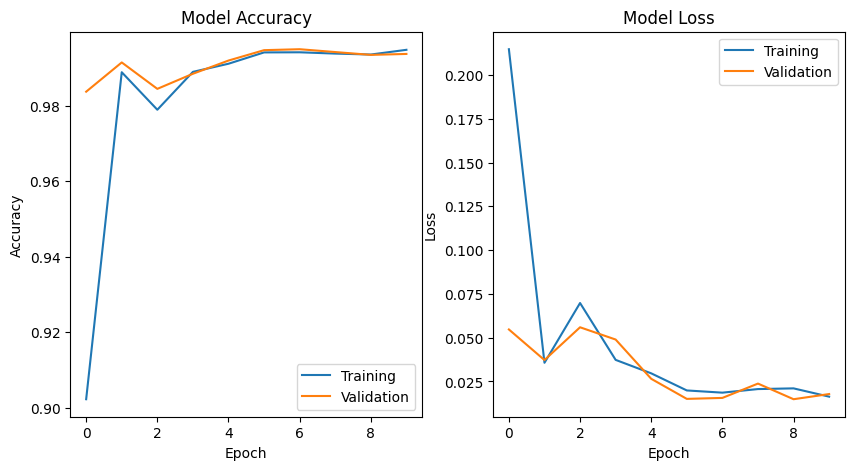

In [46]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'])

print('\n\n')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.show()

plt.show()

Dapat dilihat akurasi dan loss antara train data dan validation data memiliki nilai yang tinggi karena garis train dan val berhimpit